### **Gerekli Kütüphaneleri İçe Aktarma**

In [1]:
# gerekli kütüphanelerin içe aktarımı
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # görselleştirme için kullanıldı
import seaborn as sns  # ileri seviye görselleştirme için gerekli

### **Veri Setinin Okutulması**

Veri tablosunun sütunları ne anlam ifade ediyor:

age = yaş

sex = cinsiyet (Female/Male)

bmi = vücut kitle endeksi (ideal olarak 18,5 ila 24,9 arasında)

children = sağlık sigortası kapsamındaki çocuk sayısı

smoker =  sigara içme durumu (Yes/No)

charges = sağlık sigortası tarafından faturalandırılan bireysel tıbbi masraflar.

In [2]:
# veri setinin okutulması, yedeklenmesi, yazdırılması
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## **Veri Kümesi Hakkında Bilgi**





In [3]:
# dataFrame'in içeriği hakkında hızlı bir genel bakış yapalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Boş veri olmadığını görüyoruz.



In [5]:
# yinelenen örnek var mı diye bakalım
df.duplicated().sum()

1

1 adet yinelenen örnek bulundu daha doğru analiz yapmak için bu örneği kaldırmak gerekir.


In [6]:
# hangi örnek yinelenmiş bakalım
df_dup = df[df.duplicated()]  #df.duplicated() ifadesi, yinelenen örneklerinTrue veya False değerlerini döndüren bir boolean dizisi oluşturur
df_dup

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
# 581. örnek kaldırılıyor
df.drop(index = [581], inplace = True)

In [8]:
# önemli istatistiklerin özeti
df.describe(include = "object")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


**1)Sex (Cinsiyet) Bilgileri:**
*   Veri setinde toplam 1337 kayıt bulunmaktadır.
*   Cinsiyet kategorisinde 2 farklı değer mevcuttur: "male" (erkek) ve "female" (kadın).
*   En sık görülen cinsiyet "male" olarak, 675 kez tekrar eder.

**2)Smoker (Sigara İçiciliği) Bilgileri:**
*   Veri setinde yine toplam 1337 kayıt bulunmaktadır.
*   Sigara içiciliği kategorisinde 2 farklı değer mevcuttur: "yes" (evet) ve "no" (hayır).
*   En sık görülen durum "no" (hayır) olarak, 1063 kez tekrar eder.

**3)Region (Bölge) Bilgileri:**
*   Yine toplam 1337 kayıt bulunmaktadır.
*   Bölge kategorisinde 4 farklı değer mevcuttur: "southeast", "northwest", "southwest" ve "northeast".
*   En sık görülen bölge "southeast" olarak, 364 kez tekrar eder.













In [9]:
# temel istatistiksel özetleri inceleyelim
from pandas.core.internals.base import T
df.describe().T  # T ile sonuçları transpoz hale getirip okunaklılık kazandırdık

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


<Axes: xlabel='age'>

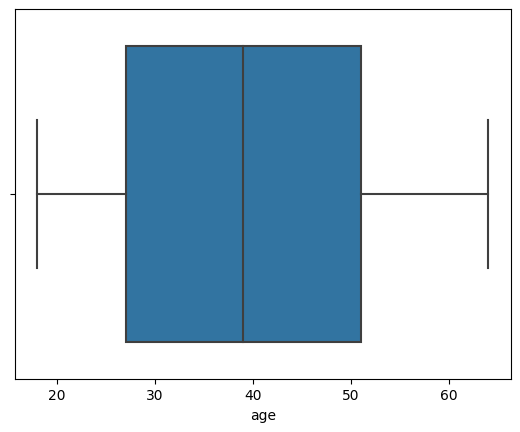

In [10]:
# aykırı veri mevcut mu diye kontrol edelim
sns.boxplot(x = "age", data = df)


<Axes: xlabel='bmi'>

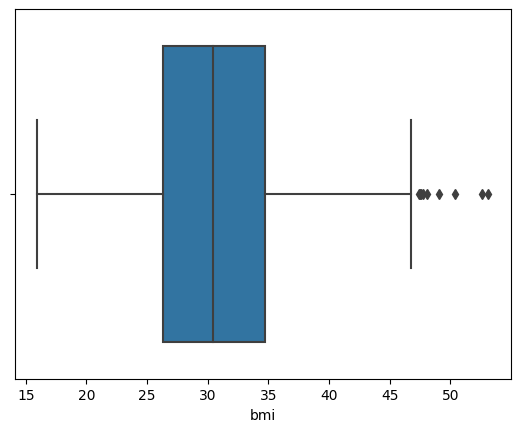

In [11]:
sns.boxplot(x = "bmi", data = df)

<Axes: xlabel='children'>

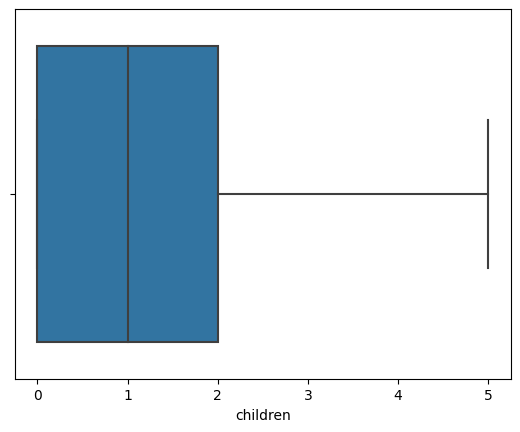

In [12]:
sns.boxplot(x = "children", data = df)

<Axes: xlabel='charges'>

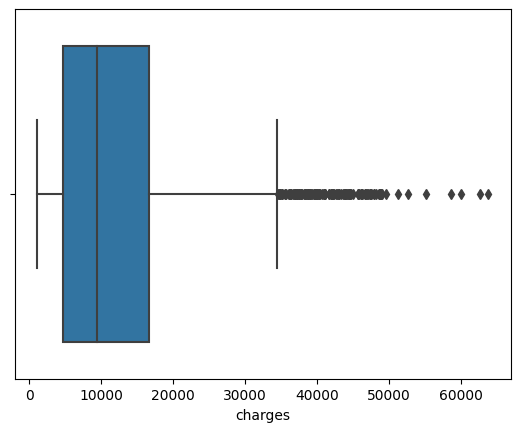

In [13]:
sns.boxplot(x = "charges", data = df)

Aykırı değerler var gibi gözüküyor fakat emin olmak için histogram grafiği çizdirelim


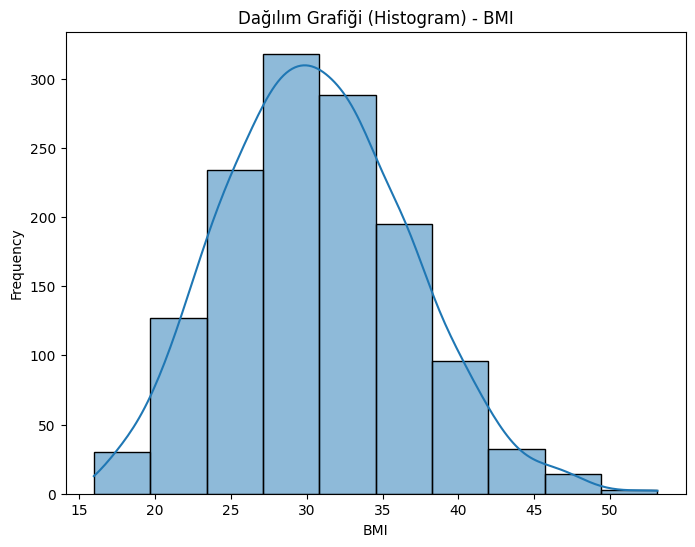

In [14]:
#  bmi için dağılım grafiği (histogram)
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], bins=10, kde=True)  #kde=True yoğunluk çizgisi ekler
plt.title("Dağılım Grafiği (Histogram) - BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

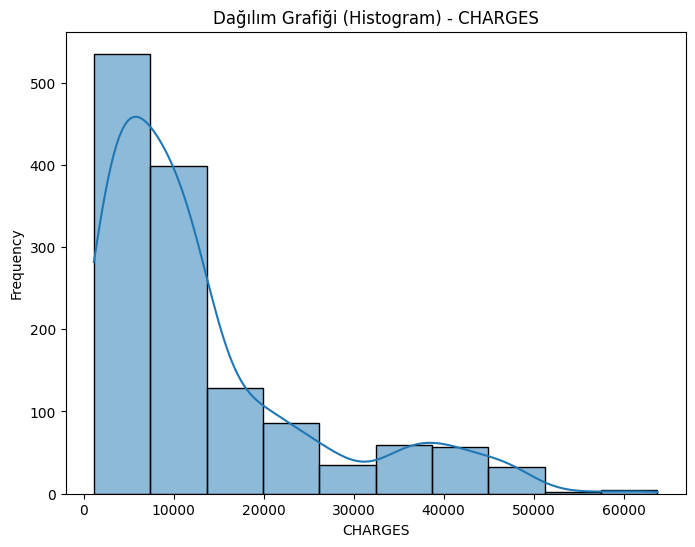

In [15]:
#  charges için dağılım grafiği (histogram)
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], bins=10, kde=True)  #kde=True yoğunluk çizgisi ekler
plt.title("Dağılım Grafiği (Histogram) - CHARGES")
plt.xlabel("CHARGES")
plt.ylabel("Frequency")
plt.show()

Bmi histogram grafiği için normale yakın diyebilirken, charges sağ çarpık bir grafik verdi. Örnek sayısı düşük olduğu için bu sonuca aykırı değermiş gibi yaklaşmayacağım. Çünkü değerler yanlış değil.

### **Veri Analizi**

**Numerical Features**

In [16]:
numerical_features = ['age','bmi', 'children','charges']

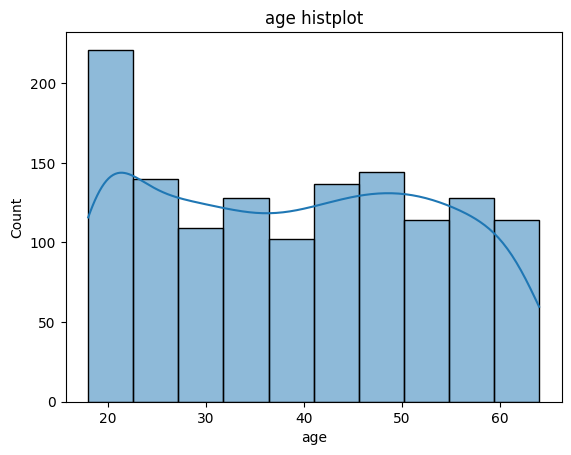

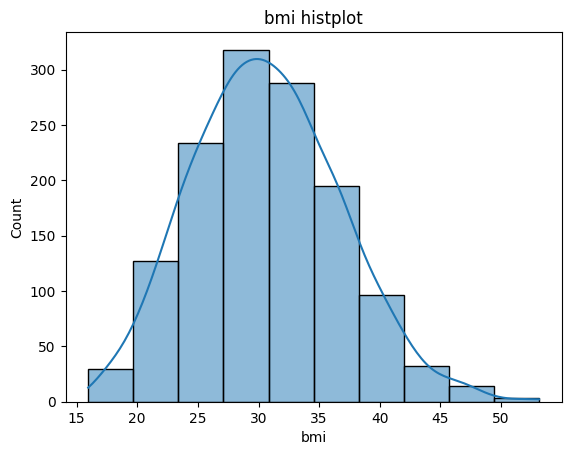

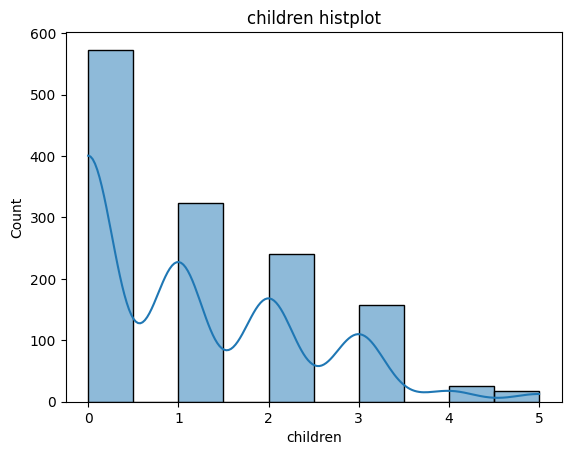

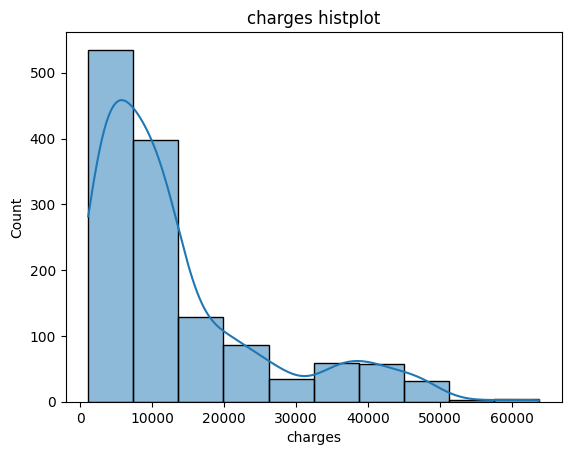

In [17]:
for nf in numerical_features : # bu değişkenler üzerinden işlem yapacak döngü başlattık
    sns.histplot(df[nf], bins=10, kde=True)  # seaborn kütüphanesi kullanılarak dağılım grafiği çizdirdik
    plt.title(f"{nf} histplot")  # grafik başlığını belirledik
    plt.show()



*   Yaş grafiğinde farklı değerler var ve yoğunluk 20'li yaşlarda
*   Bmi normal dağılım şeklinde
*  Charges sağ çarpıktır






**Categorical Features**

In [18]:
categorical_features = ['sex', 'smoker', 'region']

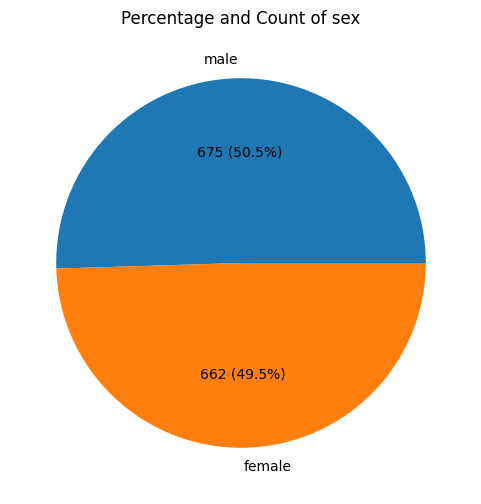

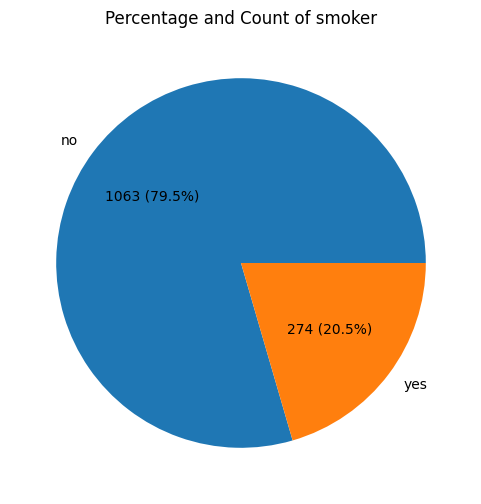

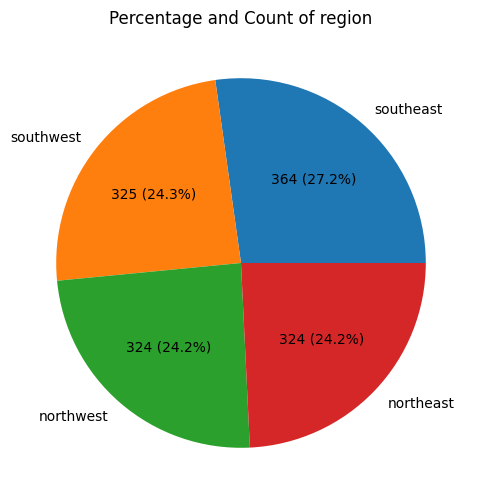

In [19]:
for c in categorical_features:  # döngü başlatılıyor
    s = df[c].value_counts()    # kategorik değişkenlerin sayısı hesaplanır s ye aktarılıyor
    plt.figure(figsize=(6, 6))  ## grafik botu belirlendi
    plt.pie(s, labels=s.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(s) / 100, p)) # pasta grafiği oluşturduk ve kişi sayılarını yazdırdık
    plt.title(f'Percentage and Count of {c}')  # grafiğe isim verdik
    plt.show()





*   Cinsiyet grafiğinde erkek müşteriler kadın müşterilerden %0.5 fazladır
*   Müşterilerin %79.5'i sigara kullanmamkta
*   Bölge grafiğinde çoğunluğu %27.2 ile güneydoğu sağlıyor. Güneybatı ve kuzeybatı aynı yüzdeye sahipken en az müşteri %24.2 ile kuzeydoğudan geliyor.









**Smoker vs Charges**

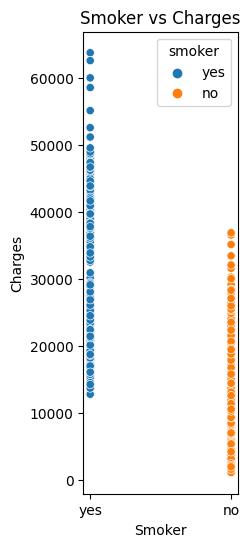

In [20]:
plt.figure(figsize=(2, 6))
sns.scatterplot(data=df, x='smoker', y='charges', hue='smoker')
plt.title("Smoker vs Charges")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

Sigara içen kişiler içmeyenlere oranla daha yüksek ücretler ödüyor.

**Smoker vs Region**

In [21]:
region_smoker_counts = df.groupby('region')['smoker'].value_counts().unstack()
region_total_counts = df['region'].value_counts()

result_df = pd.concat([region_smoker_counts, region_total_counts], axis=1)
result_df.columns = ['Non-Smoker', 'Smoker', 'Total']
result_df['Non-Smoker Ratio'] = result_df['Non-Smoker'] / result_df['Total']
result_df['Smoker Ratio'] = result_df['Smoker'] / result_df['Total']

print(result_df)

           Non-Smoker  Smoker  Total  Non-Smoker Ratio  Smoker Ratio
northeast         257      67    324          0.793210      0.206790
northwest         266      58    324          0.820988      0.179012
southeast         273      91    364          0.750000      0.250000
southwest         267      58    325          0.821538      0.178462


Bu değerleri tablolar ile görselleştirelim

1) Bölgesel Olarak İçenlerin İçmeyenlere Oranı


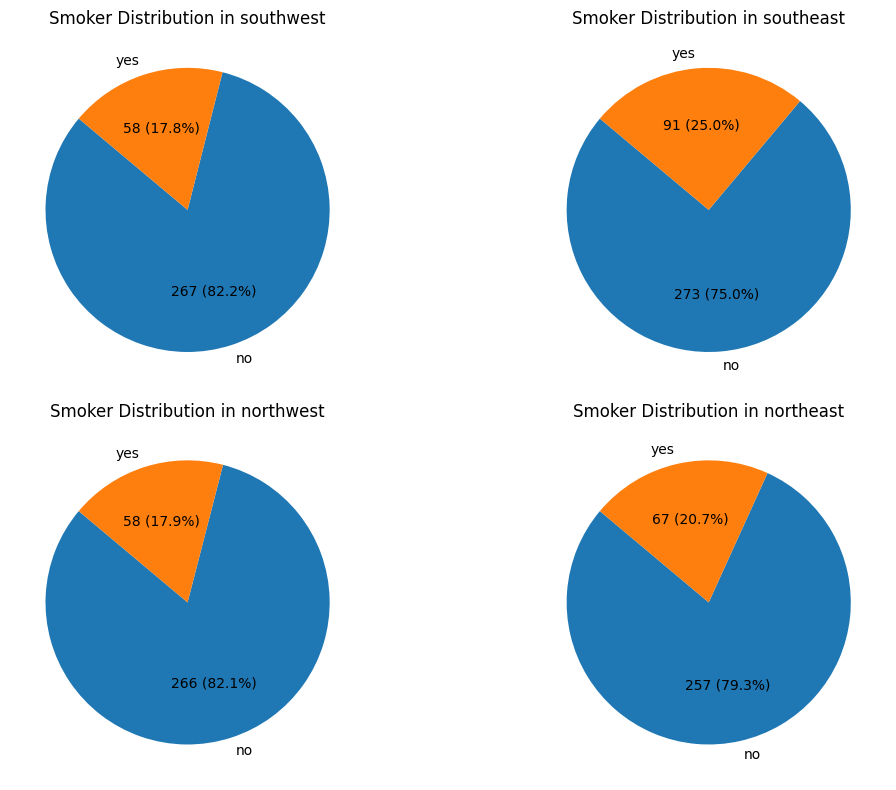

In [22]:
regions = df['region'].unique()

plt.figure(figsize=(12, 8))
for i, region in enumerate(regions, 1):
    region_data = df[df['region'] == region]
    s = region_data['smoker'].value_counts()

    plt.subplot(2, 2, i)
    plt.pie(s, labels=s.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(s) / 100, p),
            startangle=140)
    plt.title(f'Smoker Distribution in {region}')

plt.tight_layout()
plt.show()

2) En Çok Sigara İçilen Bölge

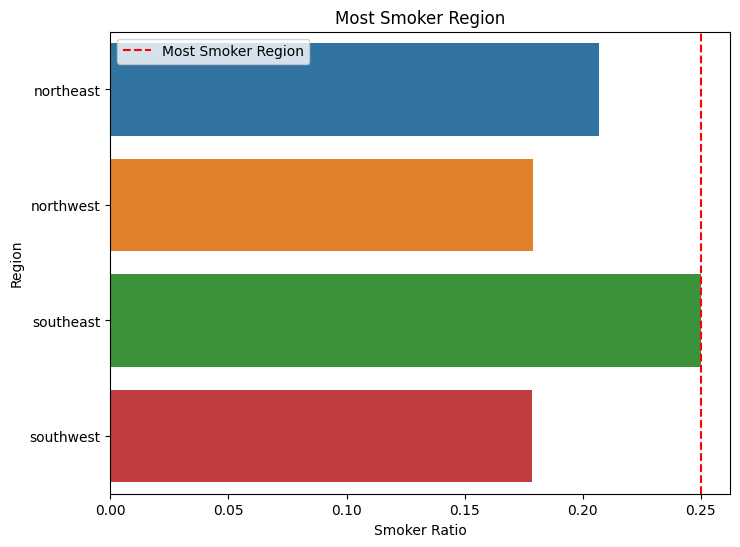

The most smoker region is southeast


In [23]:
region_smoker_ratio = df.groupby('region')['smoker'].value_counts(normalize=True).unstack()
most_smoker_region = region_smoker_ratio['yes'].idxmax()

plt.figure(figsize=(8, 6))
sns.barplot(data=region_smoker_ratio, x='yes', y=region_smoker_ratio.index)
plt.title("Most Smoker Region")
plt.xlabel("Smoker Ratio")
plt.ylabel("Region")
plt.axvline(x=region_smoker_ratio.loc[most_smoker_region, 'yes'], color='red', linestyle='--', label='Most Smoker Region')
plt.legend()
plt.show()

print(f"The most smoker region is {most_smoker_region}")

**Smoker vs Bmi**

In [24]:
smoker_count = df[df['smoker'] == 'yes'].shape[0]
non_smoker_count = df[df['smoker'] == 'no'].shape[0]

total_bmi_smoker = df[df['smoker'] == 'yes']['bmi'].sum()
total_bmi_non_smoker = df[df['smoker'] == 'no']['bmi'].sum()

print("Smoker Count:", smoker_count)
print("Non-Smoker Count:", non_smoker_count)
print("Total BMI of Smokers:", total_bmi_smoker)
print("Total BMI of Non-Smokers:", total_bmi_non_smoker)

Smoker Count: 274
Non-Smoker Count: 1063
Total BMI of Smokers: 8414.115
Total BMI of Non-Smokers: 32582.92


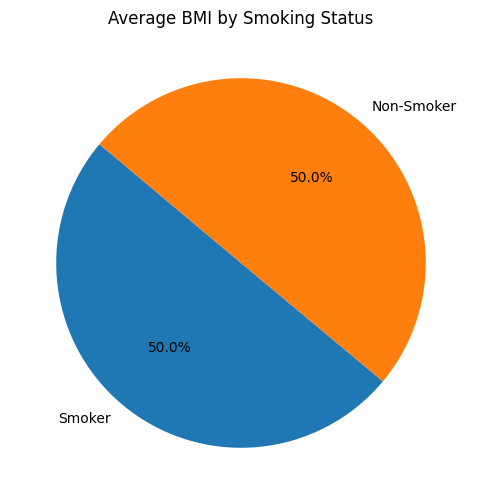

In [25]:
smoker_data = df[df['smoker'] == 'yes']
non_smoker_data = df[df['smoker'] == 'no']

avg_bmi_smoker = smoker_data['bmi'].sum() / len(smoker_data)
avg_bmi_non_smoker = non_smoker_data['bmi'].sum() / len(non_smoker_data)

avg_bmi_by_smoking = pd.Series([avg_bmi_smoker, avg_bmi_non_smoker], index=['Smoker', 'Non-Smoker'])

plt.figure(figsize=(6, 6))
plt.pie(avg_bmi_by_smoking, labels=avg_bmi_by_smoking.index, autopct='%1.1f%%', startangle=140)
plt.title("Average BMI by Smoking Status")
plt.show()

BU veri setinde sigara içenler ile içmeyenlerin bmi değerlerinin ortalaması aynı çıktı.

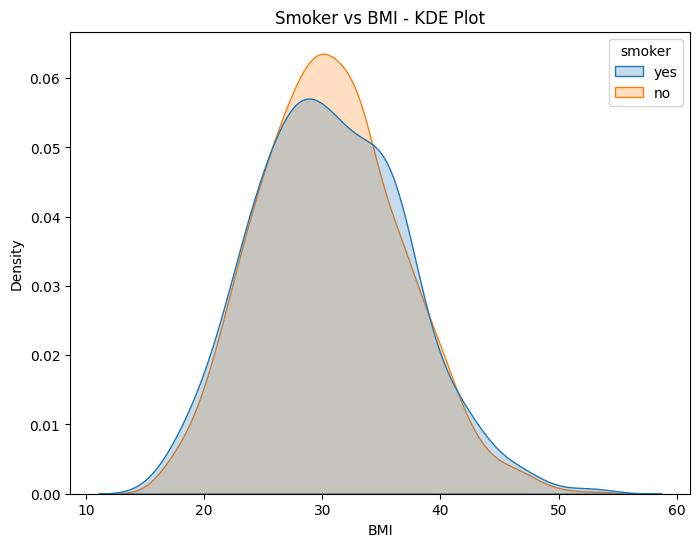

In [26]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='bmi', hue='smoker', fill=True, common_norm=False)
plt.title("Smoker vs BMI - KDE Plot")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

Sigara içenlerin 25-35 bmi değerlerinde yoğunluk oluşturduğunu söyleyebilirz.

**Bmi vs Sex**

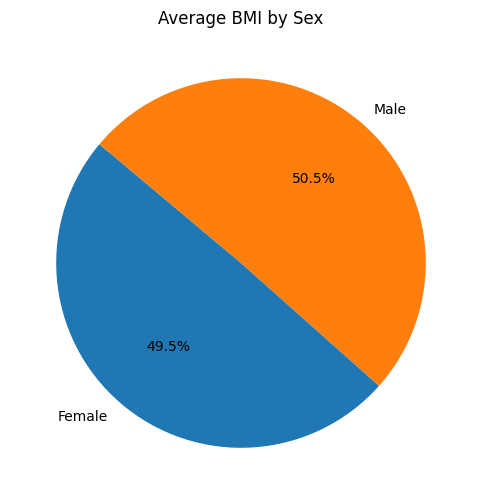

In [27]:
female_data = df[df['sex'] == 'female']
male_data = df[df['sex'] == 'male']

avg_bmi_female = female_data['bmi'].sum() / len(female_data)
avg_bmi_male = male_data['bmi'].sum() / len(male_data)

avg_bmi_by_sex = pd.Series([avg_bmi_female, avg_bmi_male], index=['Female', 'Male'])

plt.figure(figsize=(6, 6))
plt.pie(avg_bmi_by_sex, labels=avg_bmi_by_sex.index, autopct='%1.1f%%', startangle=140)
plt.title("Average BMI by Sex")
plt.show()

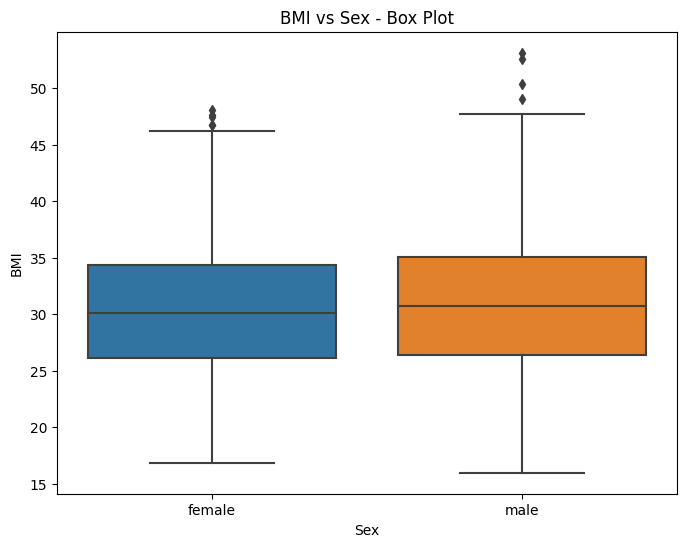

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='bmi', showfliers=True)
plt.title("BMI vs Sex - Box Plot")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()

Vücut kitle endeksinde ortalama değerler birbirlerine her ne kadar yakın olsada aşırı obez olma durumu erkeklerde daha fazla gözüküyor. Buna karşın vücut kitle endeksi en düşük olan kişide erkek.

**Bmi vs Age**

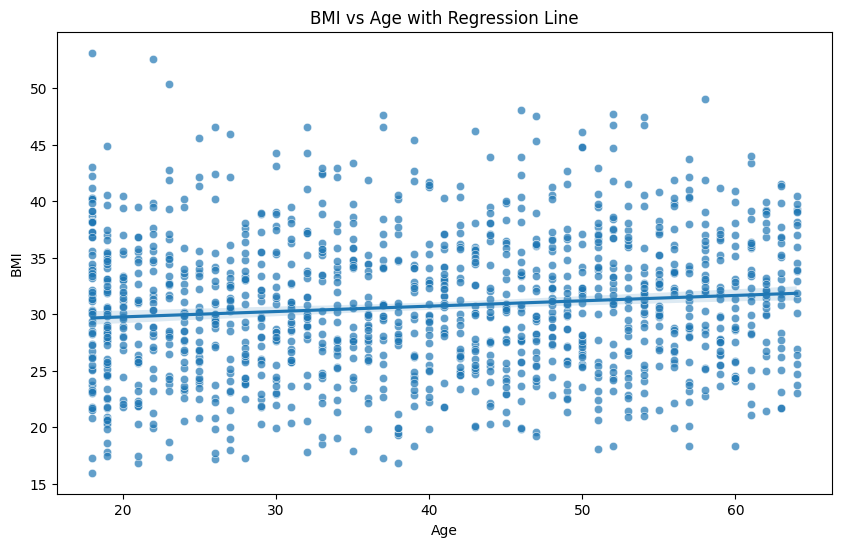

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='bmi', alpha=0.7)
sns.regplot(data=df, x='age', y='bmi', scatter=False)
plt.title("BMI vs Age with Regression Line")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

Yaşın artması bmi'nin artmasına neden olmuş. Yaş ilerledikçe kilo alımı gerçelkeşmiş.


**Bmi vs Children**

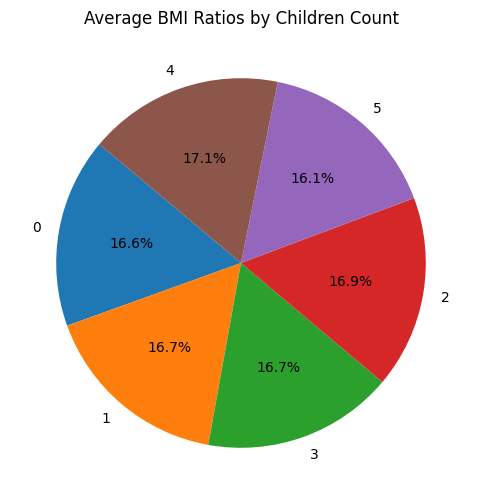

In [30]:
child_counts = df['children'].unique()  # Farklı çocuk sayılarını alalım

bmi_ratios = []  # Oranları saklamak için boş bir liste oluşturalım

for child_count in child_counts:
    child_data = df[df['children'] == child_count]
    avg_bmi = child_data['bmi'].sum() / len(child_data)
    bmi_ratios.append(avg_bmi)

# Veriyi bir DataFrame'e dönüştürelim
data = {'Children': child_counts, 'Average BMI Ratio': bmi_ratios}
bmi_ratio_df = pd.DataFrame(data)

# Pasta grafiği oluşturalım
plt.figure(figsize=(8, 6))
plt.pie(bmi_ratio_df['Average BMI Ratio'], labels=bmi_ratio_df['Children'], autopct='%1.1f%%', startangle=140)
plt.title("Average BMI Ratios by Children Count")
plt.show()

5 çocuğa sahip olanlar genelde en düşük bmi'ye sahip olarak gözüküyor. 2 çocuğa sahip kişiler ise daha yüksek bmi'ye sahiptir. Veri setinde en yüksek bmi'ye sahip kişi ise hiç çocuğa sahip değildir.

**Bmi vs Charges**

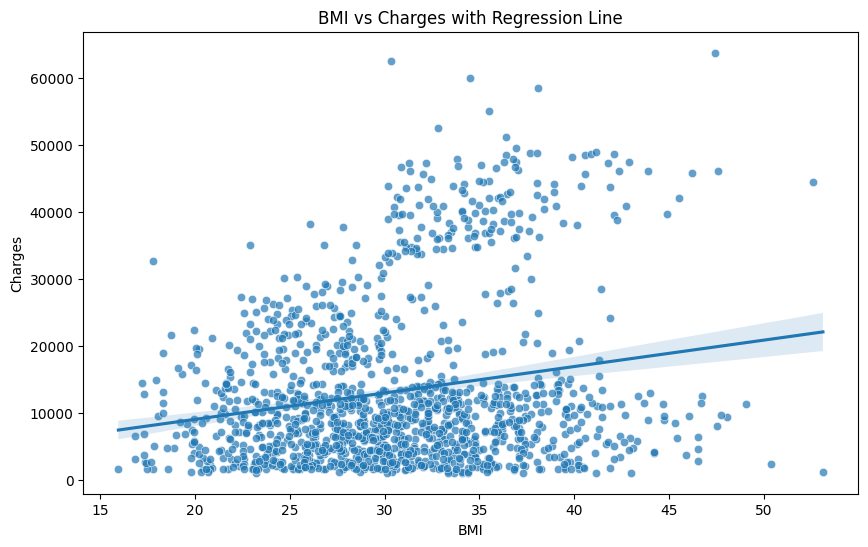

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', alpha=0.7)
sns.regplot(data=df, x='bmi', y='charges', scatter=False)
plt.title("BMI vs Charges with Regression Line")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

Vücut kitle endeksi arttıkça hastane ücretleri artış gösteriyor. Özellikle bmi değeri 30'dan sonra fark edilir bir artış mevcut.

**Region vs Children**

In [32]:
regions = df['region'].unique()
output = []

for region in regions:
    region_data = df[df['region'] == region]
    child_counts = region_data['children'].value_counts().sort_index()

    total_children = child_counts.sum()  # Toplam çocuk sayısı

    output.append({'Region': region, **child_counts, 'Total Children': total_children})

output_df = pd.DataFrame(output)
print(output_df)

      Region    0   1   2   3  4  5  Total Children
0  southwest  138  78  57  37  7  8             325
1  southeast  157  95  66  35  5  6             364
2  northwest  131  74  66  46  6  1             324
3  northeast  147  77  51  39  7  3             324


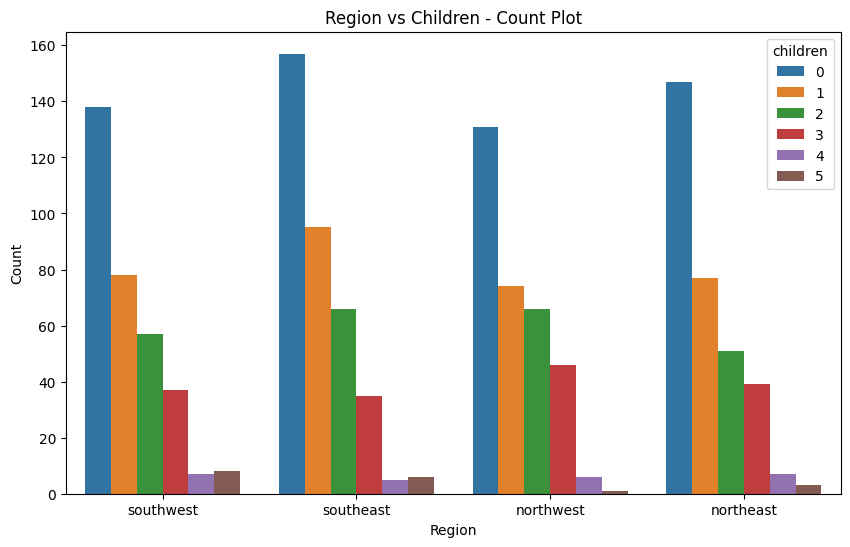

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='children')
plt.title("Region vs Children - Count Plot")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

Sonuçlara baktığımız zaman çocuk sahiibi olmayanların tüm bölgelerde yüksek bir orana sahip olduğunu görüyoruz. En yüksek çocuk miktarı ise southeast bölgesinde bulunmakta.

**Charges vs Children**

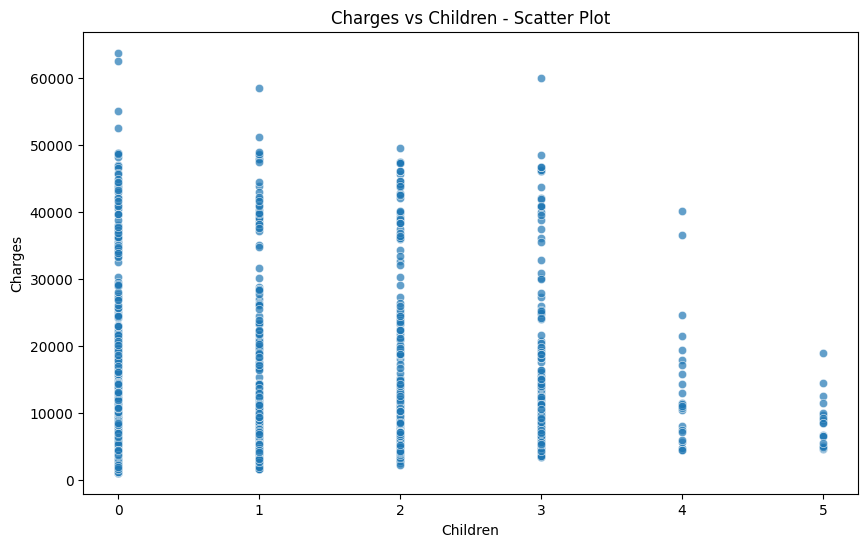

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='children', y='charges', alpha=0.7)
plt.title("Charges vs Children - Scatter Plot")
plt.xlabel("Children")
plt.ylabel("Charges")
plt.show()

Çocuk sahibi olmayan kişilerin hastane masraflarının daha yüksek olduğu gözüküyor. En düşük hastane masrafına sahip kişiler ise 5 çocuklu kişiler.

**Charges vs Age**

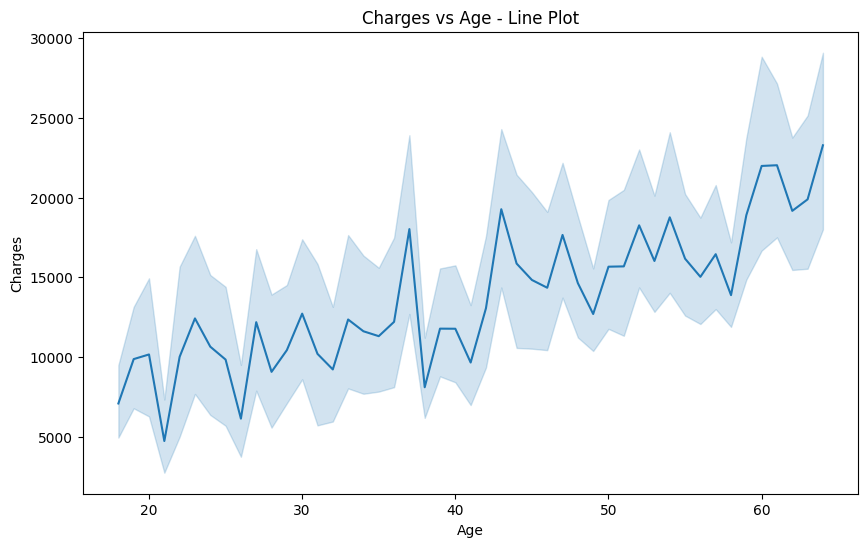

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='charges')
plt.title("Charges vs Age - Line Plot")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Yaş ilerledikçe hastane masraflarının arttığını söyleyebiliz.

**Charges vs Sex**

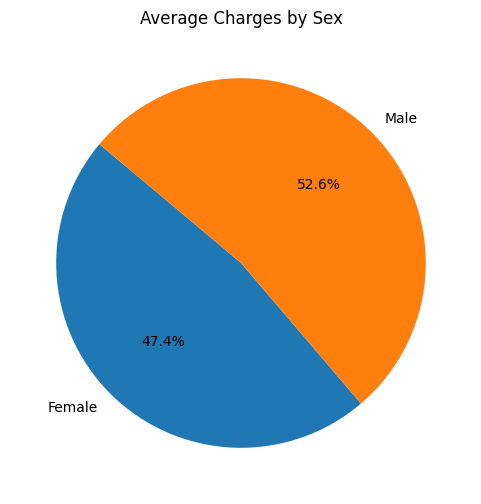

In [36]:
female_data = df[df['sex'] == 'female']
male_data = df[df['sex'] == 'male']

avg_charges_female = female_data['charges'].sum() / len(female_data)
avg_charges_male = male_data['charges'].sum() / len(male_data)

avg_charges_by_sex = pd.Series([avg_charges_female, avg_charges_male], index=['Female', 'Male'])

plt.figure(figsize=(6, 6))
plt.pie(avg_charges_by_sex, labels=avg_charges_by_sex.index, autopct='%1.1f%%', startangle=140)
plt.title("Average Charges by Sex")
plt.show()

Oranla bakıldığı zaman erkeklerin kadınlardan daha fazla ücret ödediğini söyleyebiliriz.


**Charges vs Region**

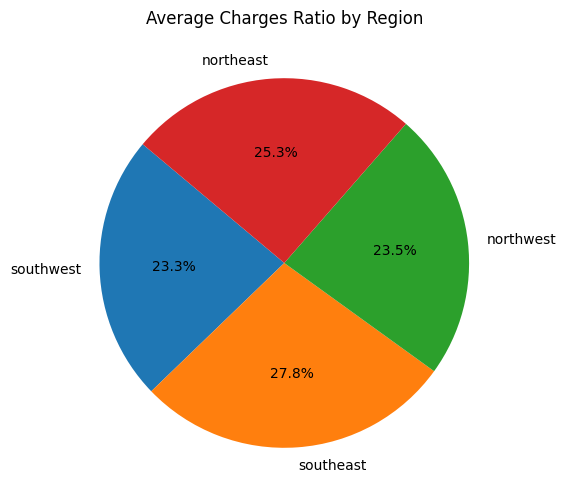

In [37]:
regions = df['region'].unique()  # Farklı bölgeleri alalım

avg_charges_by_region = []  # Oranları saklamak için boş bir liste oluşturalım

for region in regions:
    region_data = df[df['region'] == region]
    total_charges = region_data['charges'].sum()
    total_people = len(region_data)
    avg_charges = total_charges / total_people
    avg_charges_by_region.append(avg_charges)

# Veriyi bir DataFrame'e dönüştürelim
data = {'Region': regions, 'Average Charges Ratio': avg_charges_by_region}
avg_charges_ratio_df = pd.DataFrame(data)

# Pasta grafiği oluşturalım
plt.figure(figsize=(10, 6))
plt.pie(avg_charges_ratio_df['Average Charges Ratio'], labels=avg_charges_ratio_df['Region'], autopct='%1.1f%%', startangle=140)
plt.title("Average Charges Ratio by Region")
plt.show()

Güneydoğu bölgesi diğer bölgelere kıyasla daha yüksek hastane masrafına sahip. En düşük masraf ise Güneybatı bölgesinde gözüküyor.

**Region - Smoker - Bmi**

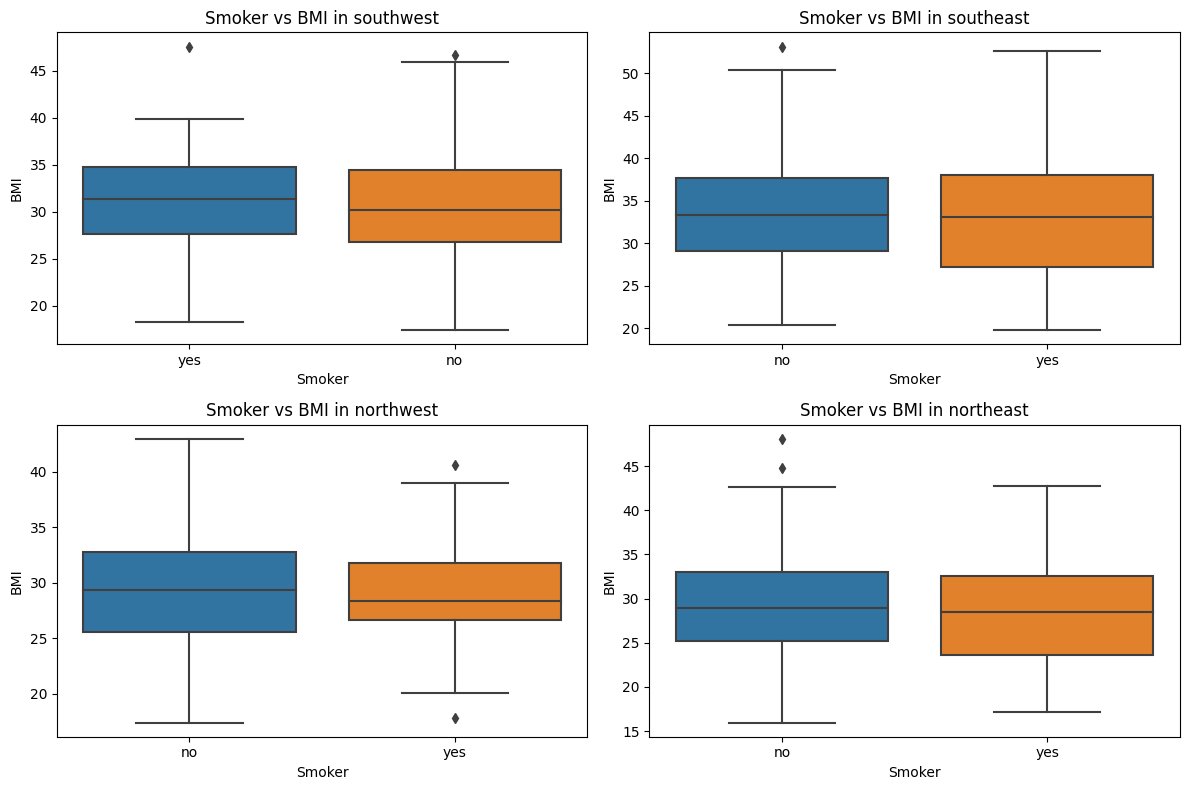

In [38]:
plt.figure(figsize=(12, 8))

for region in df['region'].unique():
    region_data = df[df['region'] == region]

    plt.subplot(2, 2, df['region'].unique().tolist().index(region) + 1)
    sns.boxplot(data=region_data, x='smoker', y='bmi')
    plt.title(f'Smoker vs BMI in {region}')
    plt.xlabel("Smoker")
    plt.ylabel("BMI")

plt.tight_layout()
plt.show()

Güneybatı:
*  Sigara içmeyenlerin ortalama bmi'nın daha düşük olduğunu gözlemliyorum.
*  Buna karşın sigara içmeyenlerde yüksek bmi'li kişi sayısı daha fazla gibi gözüküyor.

Güneydoğu:
*   İçenler ile içmeyenlerin ortalama bmi'ı eşit.

Kuzeybatı:
*   İçmeyenlerin bmi'nın daha yüksek olduğu gözlemleniyor.

Kuzeydoğu:
*   İçenler ile içmeyenlerin ortalama bmi'ı eşit.










**Smoker - Region - Charges**

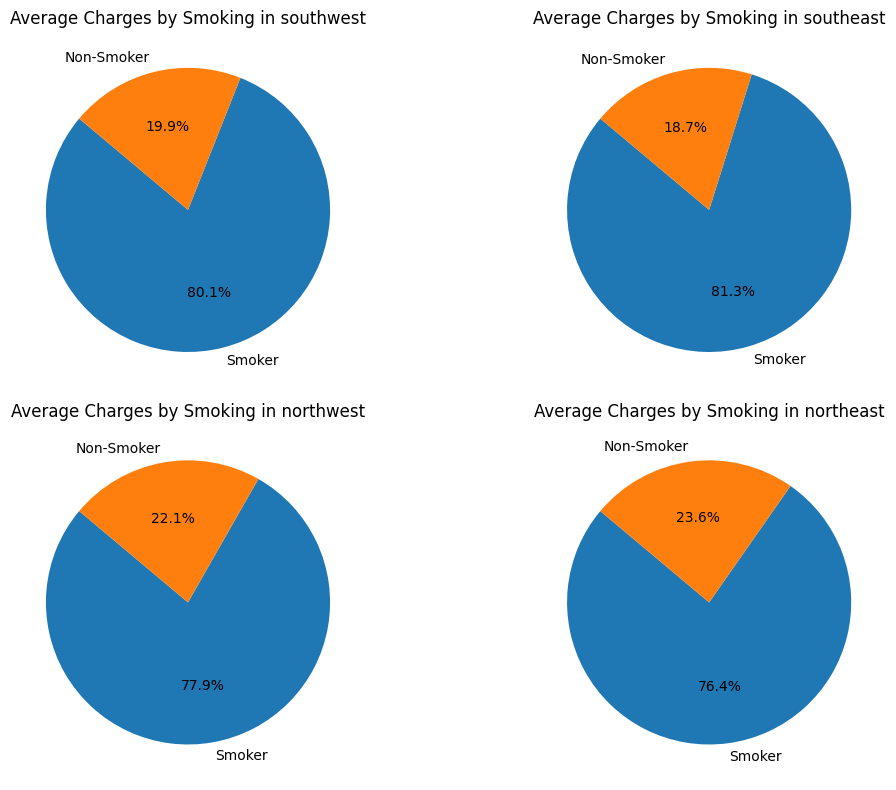

In [39]:
plt.figure(figsize=(12, 8))

for region in df['region'].unique():
    region_data = df[df['region'] == region]

    smoker_data = region_data[region_data['smoker'] == 'yes']
    non_smoker_data = region_data[region_data['smoker'] == 'no']

    avg_charges_smoker = smoker_data['charges'].sum() / len(smoker_data)
    avg_charges_non_smoker = non_smoker_data['charges'].sum() / len(non_smoker_data)

    avg_charges_by_smoking = pd.Series([avg_charges_smoker, avg_charges_non_smoker], index=['Smoker', 'Non-Smoker'])

    plt.subplot(2, 2, df['region'].unique().tolist().index(region) + 1)
    plt.pie(avg_charges_by_smoking, labels=avg_charges_by_smoking.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Average Charges by Smoking in {region}')

plt.tight_layout()
plt.show()

Tüm bölgeler için sigara içenlerin içmeyenlere oranla daha yüksek hastane masrafına sahip olduğunu söyleyebilirim.

### **Data Preprocessing (Veri Ön İşleme)**

**Label Encoding ve One-Hot Encoding:**

Veri setinizdeki kategorik değişkenleri (örneğin, cinsiyet, sigara içme durumu, bölge gibi) işlemek için Label Encoding veya One-Hot Encoding yöntemlerini kullanmak gerekir.

**Label Encoding:** Kategorik değişkenleri sayısal değerlere dönüştürmek için kullanılır. Örneğin, "male" ve "female" gibi kategorileri 0 ve 1 gibi sayısal değerlere çevirebilirsiniz.

**One-Hot Encoding:** Kategorik değişkenleri binary vektörlerine dönüştürerek her kategori için ayrı bir sütun oluşturur. Bu, sıralama veya ilişkisel bir düzen olmadığı durumlarda kullanışlıdır.

In [40]:
df = pd.get_dummies(df, columns=['sex'], prefix = 'sex', drop_first=True)
df = pd.get_dummies(df, columns=['smoker'], prefix = 'smoker', drop_first=True)
df = pd.get_dummies(df, columns=['region'], prefix = 'region', drop_first=True)

df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [41]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


Örneğin 1334. kişi region'ı northeast'tır.

**Korelasyon Haritası**

Korelasyon Haritası: iki veya daha fazla değişkenin ne kadar güçlü ve ne yönde ilişkili olduğunu gösteren istatistiksel bir araçtır.

<Axes: >

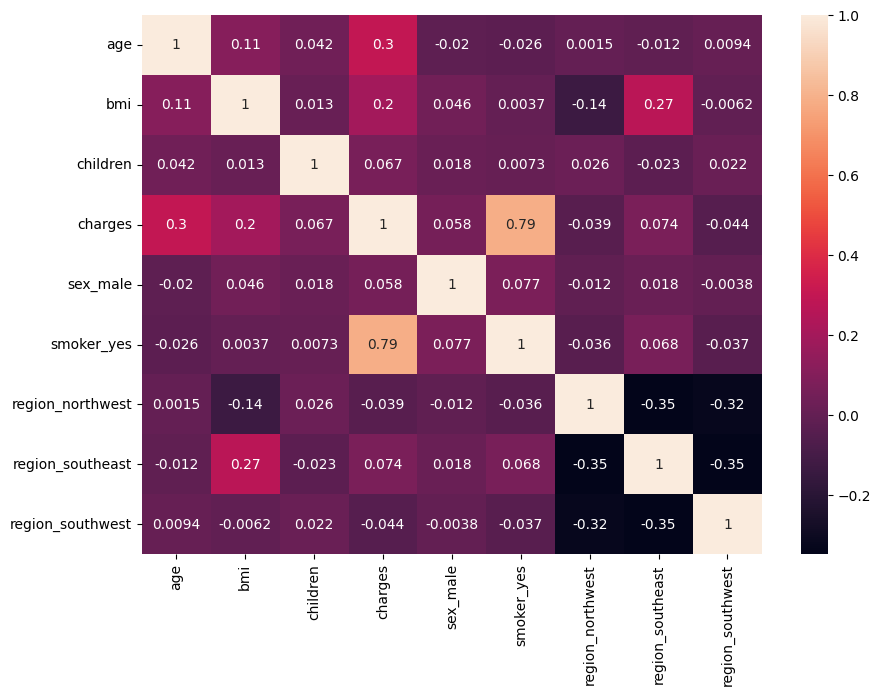

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

Sigara içenler ve hastane masrafları arasında bir korelasyon mevcut fakat bunun dışında bir korelasyondan söz edemem.


**Bağımlı (y) ve Bağımsız (X) Değişkenlerin Ayrılması**

In [44]:
y = df['charges']
X = df.drop(['charges'], axis = 1)

In [45]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [46]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Veriyi Ölçeklendirme**

Veriyi ölçeklendirmek, değişkenlerin farklı ölçeklerde olması durumunda model performansını artırabilir.
Veriyi ölçeklendirmek için Min-Max Scaling veya Standard Scaling yöntemleri kullanılır.

**Min-Max Scaling:** Değerleri belirli bir aralığa (genellikle 0 ile 1 arasına) ölçeklendirir.

**Standard Scaling:** Değerleri ortalama sıfır ve standart sapma birim olacak şekilde ölçeklendirir.

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Model Seçimi**

**Lineer Regresyon:**

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Lineer Regresyon modelini oluşturup ve eğitiyorum
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


In [53]:
# Test verileri üzerinde tahmin yapma
y_pred_lr = model_lr.predict(X_test)

In [58]:
# Lineer Regresyon tahmin sonuçlarını değerlendirme (Performans ölçümü)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Lineer Regresyon:")
print("Ortalama Mutlak Hata (MAE):", mae_lr)
print("Ortalama Kare Hata (MSE):", mse_lr)
print("R-kare (R2):", r2_lr)

Lineer Regresyon:
Ortalama Mutlak Hata (MAE): 3840.2344596368057
Ortalama Kare Hata (MSE): 33655902.61093513
R-kare (R2): 0.7577217552688665


**Karar Ağacı Regresyonu:**

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
# Karar Ağacı Regresyonu modelini oluşturup  eğitik
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [63]:
# Test verileri üzerinde tahmin yapma
y_pred_dt = model_dt.predict(X_test)

In [64]:
# Karar Ağacı Regresyonu tahmin sonuçlarını değerlendirme (Performans ölçümü)
y_pred_dt = model_dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Karar Ağacı Regresyonu:")
print("Ortalama Mutlak Hata (MAE):", mae_dt)
print("Ortalama Kare Hata (MSE):", mse_dt)
print("R-kare (R2):", r2_dt)

Karar Ağacı Regresyonu:
Ortalama Mutlak Hata (MAE): 3557.400314626865
Ortalama Kare Hata (MSE): 50778823.21719543
R-kare (R2): 0.6344592417920355


**Cross Validation:**

RMSE (Karekök Ortalama Hata Kare): tahmin edilen değerler ile gerçek değerler arasındaki farkların karesinin ortalamasının karekökünü verir. Daha düşük RMSE değeri, modelinizin tahminlerinin gerçek değerlere daha yakın olduğunu gösterir.

Cross Validation RMSE:her bir çapraz doğrulama katmanı için hesaplanan RMSE değerleridir.

Mean RMSE:tüm çapraz doğrulama katmanları için hesaplanan RMSE değerlerinin ortalamasıdır.


In [95]:
from sklearn.model_selection import cross_val_score

# Modellerin performans metriklerini toplayacak bir DataFrame oluşturalım
results_df = pd.DataFrame(columns=['Model', 'RMSE', 'R2', 'MAE'])

# Lineer Regresyon için çapraz doğrulama yapalım
linear_scores_rmse = -cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
linear_scores_r2 = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='r2')
linear_scores_mae = -cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Karar Ağacı Regresyonu için çapraz doğrulama yapalım
tree_scores_rmse = -cross_val_score(model_dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
tree_scores_r2 = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='r2')
tree_scores_mae = -cross_val_score(model_dt, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Lineer Regresyonun performans metriklerini DataFrame'e ekleyelim
results_df = pd.concat([results_df, pd.DataFrame({'Model': ['Linear Regression'] * 5,
                                'RMSE': linear_scores_rmse,
                                'R2': linear_scores_r2,
                                'MAE': linear_scores_mae})], ignore_index=True)

# Karar Ağacı Regresyonunun performans metriklerini DataFrame'e ekleyelim
results_df = pd.concat([results_df, pd.DataFrame({'Model': ['Decision Tree Regression'] * 5,
                                'RMSE': tree_scores_rmse,
                                'R2': tree_scores_r2,
                                'MAE': tree_scores_mae})], ignore_index=True)

print(results_df)

                      Model          RMSE        R2          MAE
0         Linear Regression  4.172187e+07  0.689653  4394.565346
1         Linear Regression  3.752861e+07  0.764346  4322.686069
2         Linear Regression  3.577919e+07  0.772767  4245.416690
3         Linear Regression  4.190428e+07  0.736633  4745.092725
4         Linear Regression  3.246174e+07  0.747394  3931.994684
5  Decision Tree Regression  5.040749e+07  0.625045  3504.340016
6  Decision Tree Regression  4.922715e+07  0.690887  3287.947286
7  Decision Tree Regression  4.593123e+07  0.708291  3081.535822
8  Decision Tree Regression  3.936522e+07  0.752591  2893.464565
9  Decision Tree Regression  4.784160e+07  0.627714  3089.434066


Lineer Regresyon modeli, RMSE değerleri göz önünde bulundurulduğunda daha düşük hata değerlerine sahiptir. Ayrıca R2 değeri de diğer modele göre daha yüksektir. Bu nedenle Lineer Regresyon modelinin daha iyi performans gösterdiği söylenebilir.

## **Hyper-parameter Optimization**

Hyper-parametre optimizasyonu, modelin performansını artırmak için kullanılır.


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [101]:
# Hyper-parametrelerin olası değerlerini belirleyelim
param_grid = {
    'fit_intercept': [True, False],  # Modelin intercept (kesişim) terimini hesaplamayı etkinleştirme/devre dışı bırakma
}

In [102]:
# GridSearchCV'yi oluşturma
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [103]:
# Grid Search'i eğitim verileriyle uygulayalım
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [104]:
print("Best Parameters:", grid_search.best_params_)
print("Best Negative RMSE:", grid_search.best_score_)

Best Parameters: {'fit_intercept': True}
Best Negative RMSE: -37879137.48970808


## **Model Değerlendirme**

In [108]:
# en iyi model parametrelerini kullanarak model oluşturma
from sklearn.linear_model import LinearRegression

best_model = LinearRegression(fit_intercept=True)

In [109]:
# eğitilmiş verilerle modeli tekrar eğittik
best_model.fit(X_train, y_train)

LinearRegression()

In [110]:
# test verileri üzerinden tahmin yapılsın
y_pred_best = best_model.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print("Mean Squared Error:", mse_best)
print("Mean Absolute Error:", mae_best)

Mean Squared Error: 33655902.61093513
Mean Absolute Error: 3840.2344596368057
